# The Training Loop

Colab link [here](https://colab.research.google.com/drive/1gtXn60VrFcTYezSOubLOPpR1KV0FbQPb?usp=sharing)

Once we have a model built, we have to train it. Pytorch uses a big for-loop to accomplish this task.

<br>

A single epoch consists of

1.  The forward pass
2.  Computing the loss
3.  The backward pass
4.  Updating parameters

Let's see how we do all of these in one loop.

First we have to create data and a model to train.


In [9]:
# import necessary modules
import torch
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import torch.nn as nn
import torch.nn.functional as F


train_dataset = MNIST(root='data/', train=True, download=True, transform=ToTensor())
test_dataset = MNIST(root='data/', train=False, download=True, transform=ToTensor())

train_dl = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dl = DataLoader(test_dataset, batch_size=32, shuffle=True)

class mnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(28*28, 64)
    self.layer2 = nn.Linear(64, 32)
    self.layer3 = nn.Linear(32, 10) # can you figure out why the final output is 10?

  def forward(self, x):
    x = x.view(x.size(0), -1)
    x = self.layer1(x)
    x = F.relu(x)
    x = self.layer2(x)
    x = F.relu(x)
    x = self.layer3(x)
    return x

***
# Making the Loop

Now that we have our dataloaders set up and our model created, lets make our training loop.

We define the optimizer and loss function outside of the training loop.

Wrapping the function `range()` with `tqdm()` gives us pretty progress bars to look at while the model trains.

In [10]:
# import necessary module
from tqdm import tqdm # for progress bars
import torch.optim as optim

model = mnistModel()

# loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 5

for epoch in tqdm(range(num_epochs)):
  for batch in train_dl:
    inputs, targets = batch

    # 1. forward pass
    outputs = model(inputs)

    # 2. compute loss
    loss = loss_fn(outputs, targets)

    # 3. backward pass
    optimizer.zero_grad()
    loss.backward()

    # 4. update parameters
    optimizer.step()


  print(f' Epoch {epoch + 1} / 5 complete. Last batch loss: {loss.item():.4f}')


 20%|██        | 1/5 [00:11<00:44, 11.09s/it]

Epoch 1 / 5 complete. Last batch loss: 0.2145


 40%|████      | 2/5 [00:23<00:34, 11.62s/it]

Epoch 2 / 5 complete. Last batch loss: 0.0434


 60%|██████    | 3/5 [00:33<00:22, 11.28s/it]

Epoch 3 / 5 complete. Last batch loss: 0.0241


 80%|████████  | 4/5 [00:44<00:11, 11.06s/it]

Epoch 4 / 5 complete. Last batch loss: 0.1050


100%|██████████| 5/5 [00:56<00:00, 11.20s/it]

Epoch 5 / 5 complete. Last batch loss: 0.0684


This is a very simple loop. It can get much more complicated if we want to add more utilities such as validation, loss tracking and batch statistics.

***
# Testing the model

After training the model, we can evaluate it. Let's evaluate it on a single image from the testing set.

The predicted value is: 7


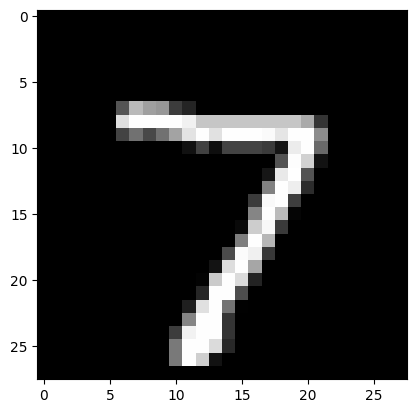

In [20]:
# import necessary modules
import matplotlib.pyplot as plt

# set the model to evaluation mode
model.eval()

# we do not need gradients to be active while we test
with torch.no_grad():
  image, label = test_dataset[0]
  plt.imshow(image.squeeze(), cmap='gray')
  image.unsqueeze(0) # add batch dimension [1, 1, 28, 28]
  image = image.view(image.size(0), -1) # flatten the image to [1, 28*28]
  output = model(image)
  prediction = output.argmax(1)
  print(f'The predicted value is: {prediction[0]}')
